<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [133]:
import matplotlib.pyplot as plt

% matplotlib inline

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

plt.style.use('fivethirtyeight') 

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

- Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

In [135]:
# First need to convert data into dataframe
# Start by investigating X and y

In [136]:
print(X.shape)
X.head()

# X contains all 13 variables except MEDV

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [137]:
print(y.shape)
y.head()

# y contains the missing MEDV
# Both X and y have same # of rows

(506, 1)


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [138]:
# Make initial df with data in X
bos_df = pd.DataFrame(X)
bos_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [139]:
# Add MEDV column from y
bos_df['MEDV'] = y
bos_df.head()
# df is ready

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Exploring the Boston Housing Data

In [140]:
# Data shape
bos_df.shape

(506, 14)

In [141]:
# Data types
bos_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [142]:
# Check for null values
bos_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [143]:
# Summary statistics
bos_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [144]:
# Number of unique values for each column
bos_df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

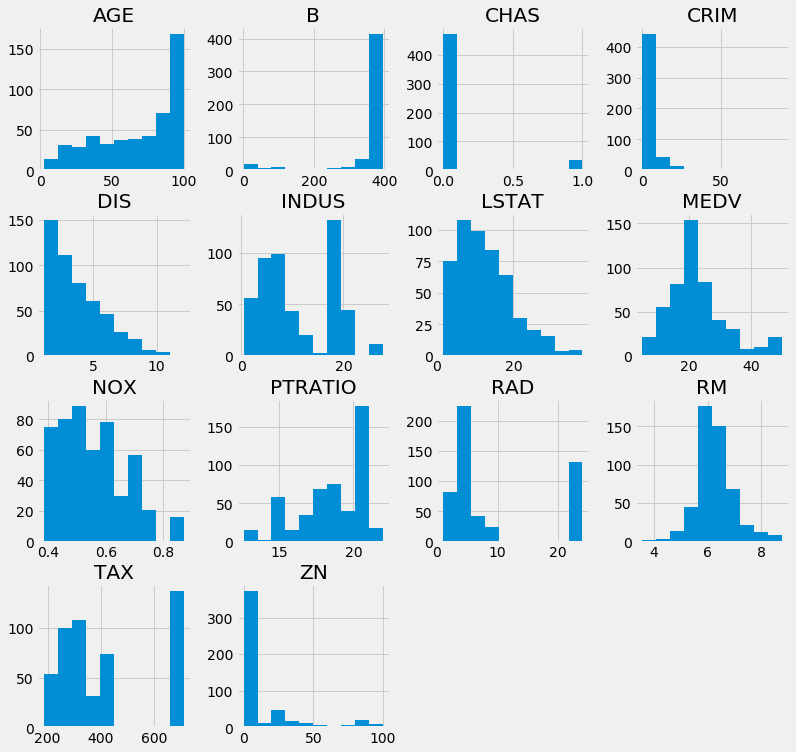

In [145]:
# Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
axes = bos_df.hist(figsize=(12,12))

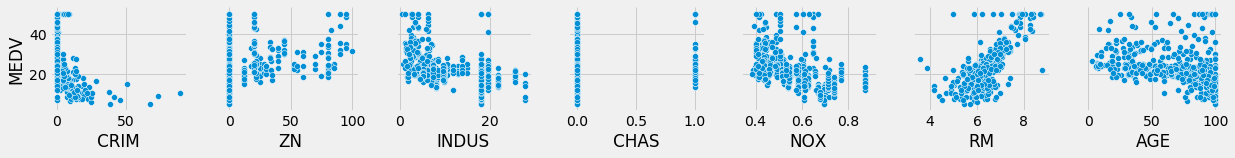

In [146]:
# Scatterplot of each column with median price

feature_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE']

g = sns.pairplot(bos_df,
                x_vars = feature_cols, 
                y_vars = 'MEDV',
                kind = 'scatter')

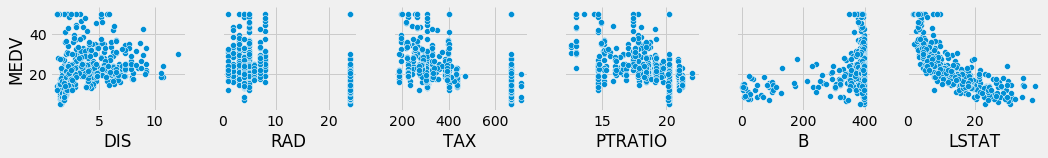

In [147]:
# Scatterplot of each column with median price, continued

feature_cols = ['DIS', 'RAD', 'TAX', 'PTRATIO', 'B','LSTAT']

g = sns.pairplot(bos_df,
                x_vars = feature_cols, 
                y_vars = 'MEDV',
                kind = 'scatter')

### Boston Housing LinReg Null Model

- Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)

In [148]:
from sklearn import metrics

# Determine mean value of MEDV column
print('Mean of MEDV:', bos_df.loc[:, 'MEDV'].mean())

# Create array of zeros and add the mean MEDV value
null_pred = np.zeros(len(bos_df.loc[:, 'MEDV'])) + bos_df.loc[:, 'MEDV'].mean()

# Calculate MSE of null model (true, pred)
print('Null Model MSE:', metrics.mean_squared_error(bos_df.loc[:, 'MEDV'], null_pred))

Mean of MEDV: 22.532806324110698
Null Model MSE: 84.41955615616554


### Initial Boston Housing LinReg Model

- Develop a linear regression model to predict MEDV. Train it on 70% of the data. Gets its MSE on both that 70% and the other 30%.

In [149]:
# Linear Regression: import, instantiate, fit, predict
from sklearn.linear_model import LinearRegression # import
from sklearn.model_selection import train_test_split

feature_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
                'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B','LSTAT']

X = bos_df.loc[:, feature_cols]
y = bos_df.loc[:, 'MEDV']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=123, train_size=0.70, test_size=0.3)

linreg = LinearRegression() # instantiate
linreg.fit(X_train, y_train) # fit
y_pred = linreg.predict(X_test) # predict

# MSE on training set
print('MSE Training:', metrics.mean_squared_error(y_train, linreg.predict(X_train)))

# MSE on test set
print('MSE Testing:', metrics.mean_squared_error(y_test, y_pred))

MSE Training: 20.19770234867637
MSE Testing: 28.37644965546655


- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [150]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)
list(kf.split(X,y))

# yields 20 arrays (10 sets of 2)

[(array([  0,   1,   3,   4,   5,   6,   7,   8,   9,  10,  11,  13,  14,
          15,  16,  17,  18,  20,  21,  23,  25,  26,  27,  31,  32,  33,
          34,  35,  36,  37,  38,  39,  40,  41,  42,  44,  45,  46,  48,
          49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
          62,  63,  64,  65,  66,  68,  69,  70,  71,  72,  73,  74,  75,
          76,  77,  78,  79,  80,  81,  82,  83,  84,  86,  87,  88,  89,
          90,  92,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
         105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118,
         119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
         132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
         147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160,
         161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
         174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
         187, 188, 189, 190, 191, 192,

In [151]:
mse_training_values = []
mse_testing_values = []

for train_indices, test_indices in kf.split(X, y):
    lr = LinearRegression() 
    X_train = X.iloc[train_indices, :] 
    y_train = y.iloc[train_indices]
    lr.fit(X_train, y_train) 
    
    X_test = X.iloc[test_indices, :]
    y_test = y.iloc[test_indices]
    
    y_pred = lr.predict(X_test)
    
    mse_train = metrics.mean_squared_error(y_train, linreg.predict(X_train))
    mse_training_values.append(mse_train)
    
    mse_test = metrics.mean_squared_error(y_test, y_pred)
    mse_testing_values.append(mse_test)

print('MSE Training:', mse_training_values)

print('MSE Testing:', mse_testing_values)

MSE Training: [21.08385001757109, 23.796566330453402, 23.535737996680865, 22.140056071772943, 20.747403134330014, 23.495631668908484, 23.45251067037296, 23.2334605984763, 21.300491429986792, 23.757410627019254]
MSE Testing: [41.13258917674563, 14.851452117383383, 17.91467136435311, 27.684212397384915, 40.35044054879694, 15.546228147442047, 15.523841217486286, 19.73519544338577, 34.56427065250419, 12.673118139968025]


In [152]:
print('Avg Train MSE:', sum(mse_training_values)/float(len(mse_training_values)))
print('Avg Test MSE:', sum(mse_testing_values)/float(len(mse_testing_values)))

Avg Train MSE: 22.654311854557207
Avg Test MSE: 23.99760192054503


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

Across the 10 cross-validation runs, the model achieved an average MSE of 22.65 on the training set, substantially better than the null model, which had an MSE of 84.42. The model does better than just guessing the mean each time, meaning some of the features have predictive value. 

The model is more complex, so bias decreased and variance increased as compared to the null model.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The model achieved a MSE of 22.65 on the training set and 24.24 on the test set, only slightly higher. The MSE training values range from 20.27 to 24.01, while the MSE testing values range from 10.10 to 47.36. While the means of the two sets are comparable, there is a notable difference in their ranges, suggesting higher variance (and overfitting of the model). 

- How much of a bias problem does your model appear to have? Why do you say that?

The model appears to have less of a bias problem than a variance problem since the training error is not unacceptably high.

- How much of a variance problem does your model appear to have? Why do you say that?

The model appears to have more of a variance problem than a bias problem since the training error is low, but there is a gap between the training and test error (when looking at the range of outputs from the k-fold cross validation)

### Adjusting Boston LinReg Model

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

In [153]:
# remove some of the feature_cols based on the scatterplots in the EDA above

feature_cols = ['CRIM', 'ZN', 'NOX', 'RM','LSTAT']

X = bos_df.loc[:, feature_cols]
y = bos_df.loc[:, 'MEDV']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=123, train_size=0.70, test_size=0.3)

linreg = LinearRegression() 
linreg.fit(X_train, y_train) 
y_pred = linreg.predict(X_test) 

In [154]:
kf = KFold(n_splits=10, shuffle=True)
list(kf.split(X,y))

mse_training_values = []
mse_testing_values = []

for train_indices, test_indices in kf.split(X, y):
    lr = LinearRegression() 
    X_train = X.iloc[train_indices, :] 
    y_train = y.iloc[train_indices]
    lr.fit(X_train, y_train) 
    
    X_test = X.iloc[test_indices, :]
    y_test = y.iloc[test_indices]
    
    y_pred = lr.predict(X_test)
    
    mse_train = metrics.mean_squared_error(y_train, linreg.predict(X_train))
    mse_training_values.append(mse_train)
    
    mse_test = metrics.mean_squared_error(y_test, y_pred)
    mse_testing_values.append(mse_test)

print('MSE Training:', mse_training_values)
print('MSE Testing:', mse_testing_values)

print('Avg Train MSE:', sum(mse_training_values)/float(len(mse_training_values)))
print('Avg Test MSE:', sum(mse_testing_values)/float(len(mse_testing_values)))

MSE Training: [29.67339673660614, 31.13643899398723, 29.88999300880934, 31.926424324043044, 29.726124448357474, 28.912818762427396, 31.175551490606374, 31.229409215015806, 29.062534387753008, 28.415962707716936]
MSE Testing: [34.022896282811665, 20.563392120202625, 32.812683368004876, 14.042320676246813, 36.79344315578979, 41.50512124824678, 19.619698074712993, 21.24488356840189, 40.63866867999613, 45.471167183435526]
Avg Train MSE: 30.11486540753227
Avg Test MSE: 30.67142743578491


_Did your model get better or worse? By how much?_

Across the ten k-fold cross validation runs, the average MSE for the test set was 31.2, with a range between 23.79 and 45.39, which is worse than the initial model (by 8). This means I must have removed one or more of the variables that were improving the model's accuracy. 

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.

# KNN Practice

In [155]:
from sklearn.neighbors import KNeighborsClassifier

# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [156]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [157]:
# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [158]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [159]:
iris.loc[:, 'species_num'] = iris.loc[:, 'species'].map(
    {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


## Exploratory Data Analysis

- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species

In [160]:
# Data shape
iris.shape

(150, 6)

In [161]:
# Data types
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_num       int64
dtype: object

In [162]:
# Count of null values by column
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_num     0
dtype: int64

In [163]:
# Basic summary statistics
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [164]:
# Number of unique values for each column
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
species_num      3
dtype: int64

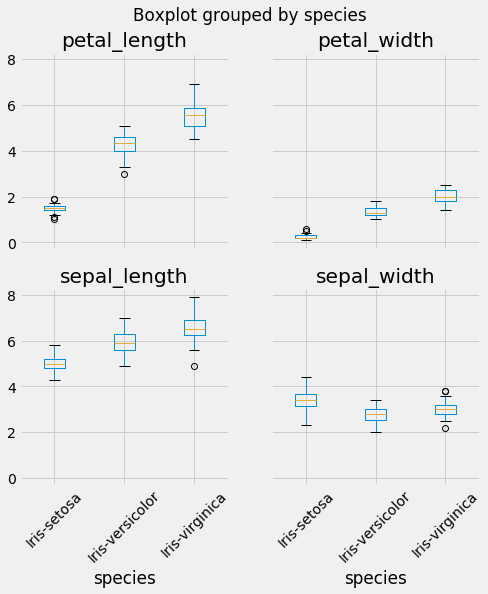

In [165]:
# Plot of the distribution of each column grouped by species

axes = iris.boxplot(by='species', 
                    column=['petal_length', 
                            'petal_width', 
                            'sepal_length',
                            'sepal_width'], 
                    figsize=(8,8), 
                    rot=45)

## Determining Accuracy of a Null Model

- Get the accuracy of a null model that simply predicts the most common species.

In [166]:
# Determine most common species
iris.loc[:, 'species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

In [167]:
# All three species occur in the dataset 50 times
# So each have the same chance of being selected
# Easy to see null model will yield accuracy of 33.33%
# Showing steps to calculate

null_pred = np.zeros(len(iris.loc[:, 'species_num'])) + 1
print('Accuracy of null model predicting most common species:', 
      metrics.accuracy_score(iris.loc[:, 'species_num'], null_pred))

Accuracy of null model predicting most common species: 0.3333333333333333


## Developing a KNN Model

- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [168]:
# Develop initial KNN model
# No need to standardize feature variables since  same units
# Tested this using StandardScalar and model accuracy decreased, so omitting this step

feature_cols = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']

X = iris.loc[:, feature_cols]
y = iris.loc[:, 'species_num']
                
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   random_state=123,
                                                   shuffle=True)

# Start with n_neighbors=3
knn = KNeighborsClassifier(n_neighbors=3) # instantiate
knn.fit(X_train, y_train) # fit
y_pred_class = knn.predict(X_test) # predict

print('Accuracy of model (without k-fold):', 
      metrics.accuracy_score(y_test, y_pred_class))

Accuracy of model (without k-fold): 0.9473684210526315


## K-Fold Cross Validation

In [169]:
kf = KFold(n_splits=10, shuffle=True)
kf.split(X, y)

accuracy_train_values = []
accuracy_test_values = []

for train_indices, test_indices in kf.split(X, y):
    knn = KNeighborsClassifier(n_neighbors=3)
    X_train = X.iloc[train_indices, :] 
    y_train = y.iloc[train_indices]
    knn.fit(X_train, y_train) 
    
    X_test = X.iloc[test_indices, :]
    y_test = y.iloc[test_indices]
    
    y_pred_class = knn.predict(X_test)
    
    accuracy_train = metrics.accuracy_score(y_train, knn.predict(X_train))
    accuracy_train_values.append(accuracy_train)
    
    accuracy_test = metrics.accuracy_score(y_test, y_pred_class)
    accuracy_test_values.append(accuracy_test)

print('Training Accuracy:', accuracy_train_values)
print('Testing Accuracy:', accuracy_test_values)   

Training Accuracy: [0.9555555555555556, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9629629629629629, 0.9703703703703703, 0.9629629629629629, 0.9555555555555556, 0.9555555555555556, 0.9629629629629629]
Testing Accuracy: [1.0, 0.8666666666666667, 1.0, 1.0, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 1.0, 1.0, 0.9333333333333333]


In [170]:
print('Avg Train Accuracy:', sum(accuracy_train_values)/float(len(accuracy_train_values)))
print('Avg Test Accuracy:', sum(accuracy_test_values)/float(len(accuracy_test_values)))

Avg Train Accuracy: 0.9614814814814816
Avg Test Accuracy: 0.9600000000000002


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The null model had an accuracy score of 0.33, so the KNN model (with n_neighbors=3) did substantially better, with accuracy scores on the training set between 0.95 to 0.97. The KNN model has much more predictive value than the null model. The training error is nominal in this case, so there doens't appear to be a bias problem. And there is not a big gap between the training error and the testing error, meaning there doesn't seem to be a variance problem.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The model performed very similar on both the training set and the test set. Similarly, since there is not a big gap between the two, the results suggest there isn't a variance problem.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

Neither, with n_neighbors=3 as is in this model. As noted above, the training error is very small (meaning there does not appear to be a bias problem) and there is not a big gap between the training and testing errors (meaning there doens't appear to be a variance problem).

- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

In [171]:
# doens't appear to be a bias or variance problem
# therefore just testing with another value for k

kf = KFold(n_splits=10, shuffle=True)
kf.split(X, y)

accuracy_train_values = []
accuracy_test_values = []

for train_indices, test_indices in kf.split(X, y):
    knn = KNeighborsClassifier(n_neighbors=40)
    X_train = X.iloc[train_indices, :] 
    y_train = y.iloc[train_indices]
    knn.fit(X_train, y_train) 
    
    X_test = X.iloc[test_indices, :]
    y_test = y.iloc[test_indices]
    
    y_pred_class = knn.predict(X_test)
    
    accuracy_train = metrics.accuracy_score(y_train, knn.predict(X_train))
    accuracy_train_values.append(accuracy_train)
    
    accuracy_test = metrics.accuracy_score(y_test, y_pred_class)
    accuracy_test_values.append(accuracy_test)

print('Training Accuracy:', accuracy_train_values)
print('Testing Accuracy:', accuracy_test_values)   

Training Accuracy: [0.9555555555555556, 0.9481481481481482, 0.9407407407407408, 0.9407407407407408, 0.9555555555555556, 0.9629629629629629, 0.9629629629629629, 0.9481481481481482, 0.9555555555555556, 0.9407407407407408]
Testing Accuracy: [0.9333333333333333, 1.0, 0.9333333333333333, 1.0, 0.8666666666666667, 0.8666666666666667, 1.0, 1.0, 0.9333333333333333, 0.9333333333333333]


In [172]:
print('Avg Train Accuracy:', sum(accuracy_train_values)/float(len(accuracy_train_values)))
print('Avg Test Accuracy:', sum(accuracy_test_values)/float(len(accuracy_test_values)))

Avg Train Accuracy: 0.9511111111111111
Avg Test Accuracy: 0.9466666666666667


_Did your model get better or worse? By how much?_

Increasing the the n_neighbors value from 3 to 40 decreased the model's accuracy. When k=3, the average testing accuracy across the 10 cross validation runs was 0.96, whereas the testing accuracy decreased to 0.93 when k was increased to 40. 

- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

In [173]:
# Determine the best value of k, starting with the training set
train_scores = []
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y) # training set performance, so use whole dataset
    pred = knn.predict(X)
    score = sum(pred ==  y) / len(y) # accuracy score
    train_scores.append([k, score]) # add accuracy score to list with each k

scores_df = pd.DataFrame(train_scores, columns=['k', 'train_score'])
scores_df.head()

,k,train_score
0,1,1.000000
1,2,0.980000
2,3,0.960000
3,4,0.960000
4,5,0.966667


In [174]:
# Do the same for the test set
test_scores = []

for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    test_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    test_scores.append(test_accuracy)
    
scores_df.loc[:, 'test_score'] = test_scores
scores_df.head()

,k,train_score,test_score
0,1,1.000000,1.0
1,2,0.980000,1.0
2,3,0.960000,1.0
3,4,0.960000,1.0
4,5,0.966667,1.0


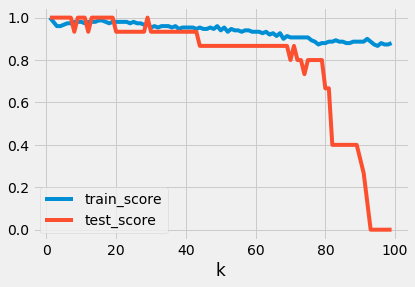

In [175]:
# Plot test and training scores against k

ax = scores_df.plot(x='k', y='train_score')
scores_df.plot(x='k', y='test_score', ax=ax)

In [132]:
scores_df.sort_values('test_score', ascending=False).head()

# Multiple k-values yield the highest test score
# Can select from any of these for the model (15, 9, 17, 16, 14, etc.)

,k,train_score,test_score
0,1,1.000000,1.0
46,47,0.953333,1.0
33,34,0.960000,1.0
34,35,0.960000,1.0
35,36,0.953333,1.0


- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

## Bonus

`scikit-learn` is the most popular machine learning library in Python, but there are alternative packages that have different strengths. 

### Example: Using the Statsmodels Formula

In [42]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.loc[:, 'MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [43]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Wed, 15 Aug 2018   Prob (F-statistic):          1.59e-321
Time:                        07:13:49   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

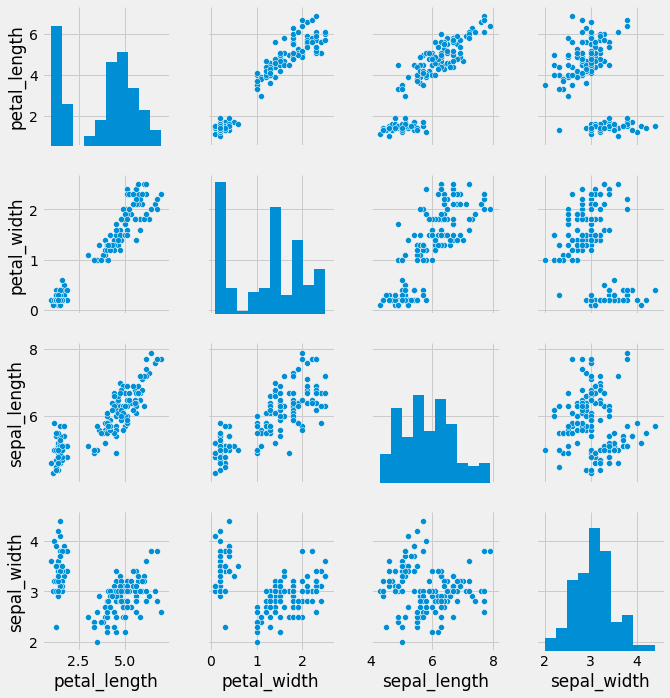

In [44]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [45]:
# Check out Pearson scores


### Demo: Patsy

In [46]:
import patsy

# Add response to the core DataFrame
df.loc[:, 'MEDV'] = y

In [47]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


/Users/emilynilson/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [48]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: -0.11842296412722764
